<a href="https://colab.research.google.com/github/Mahalakshmi-Telidevara/Sentiment-Classification-Using-RoBERTa/blob/main/sentiment_analysis_RoBERTa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy joblib matplotlib scikit-learn datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 13.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which 

In [ ]:
!pip install -U transformers==4.51.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 111.3 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.51.1
    Uninstalling transformers-4.51.1:
      Successfully uninstalled transformers-4.51.1


In [ ]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset

In [ ]:
# Load Dataset
try:
    df = pd.read_csv('twitter_multi_class_sentiment.csv')
    if not df.empty:
        print("Dataset uploaded successfully!\n")
        print("First few rows:\n", df.head())
        print("\nLast few rows:\n", df.tail())
        print("\nUnique sentiment labels:", df['label_name'].unique())
    else:
        print("Dataset upload unsuccessful: File is empty.")
except FileNotFoundError:
    print("Dataset upload unsuccessful: File not found.")
except Exception as e:
    print("Dataset upload unsuccessful:", str(e))

Dataset uploaded successfully!

First few rows:
                                                 text  label label_name
0                            i didnt feel humiliated      0    sadness
1  i can go from feeling so hopeless to so damned...      0    sadness
2   im grabbing a minute to post i feel greedy wrong      3      anger
3  i am ever feeling nostalgic about the fireplac...      2       love
4                               i am feeling grouchy      3      anger

Last few rows:
                                                     text  label label_name
16020                      I feel so alone in this world      0    sadness
16021  I'm happy for you, but I wish things had turne...      5   surprise
16022  I'm moving forward with excitement, but leavin...      5   surprise
16023                                           not good      0    sadness
16024                                            not sad      1        joy

Unique sentiment labels: ['sadness' 'anger' 'love' 'surpr

In [ ]:
# 3. Preprocess the data
df.dropna(subset=['label_name'], inplace=True)
label_encoder = LabelEncoder()
df['encoded_label'] = label_encoder.fit_transform(df['label_name'])
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['encoded_label'], test_size=0.2, random_state=42)

# Check class distribution in the dataset
print("Original dataset class distribution:")
print(df['encoded_label'].value_counts())
print("\nTraining set class distribution:")
print(y_train.value_counts())
print("\nTesting set class distribution:")
print(y_test.value_counts())
print("Preprocessing completed successfully!")

Original dataset class distribution:
encoded_label
2    5367
4    4684
0    2159
1    1937
3    1304
5     574
Name: count, dtype: int64

Training set class distribution:
encoded_label
2    4288
4    3745
0    1742
1    1553
3    1047
5     445
Name: count, dtype: int64

Testing set class distribution:
encoded_label
2    1079
4     939
0     417
1     384
3     257
5     129
Name: count, dtype: int64
Preprocessing completed successfully!


In [ ]:
# 4. TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
# 5. Train SVM Model
print("Training SVM model...")
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train_tfidf, y_train)

Training SVM model...


SVC(kernel='linear', probability=True)

In [ ]:
# 6. Predictions
y_pred_svm = svm_model.predict(X_test_tfidf)

In [ ]:
# 7. Classification report of SVM
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm, target_names=label_encoder.classes_))

SVM Classification Report:
              precision    recall  f1-score   support

       anger       0.89      0.84      0.86       417
        fear       0.84      0.82      0.83       384
         joy       0.87      0.94      0.91      1079
        love       0.86      0.69      0.77       257
     sadness       0.90      0.92      0.91       939
    surprise       0.84      0.62      0.71       129

    accuracy                           0.88      3205
   macro avg       0.87      0.81      0.83      3205
weighted avg       0.88      0.88      0.87      3205



In [ ]:
# 8. Calculate SVM performance
svm_eval_results = {
    'accuracy': accuracy_score(y_test, y_pred_svm),
    'precision': precision_score(y_test, y_pred_svm, average='weighted'),
    'recall': recall_score(y_test, y_pred_svm, average='weighted'),
    'f1-score': f1_score(y_test, y_pred_svm, average='weighted')
}

In [ ]:
# 9. Save model and vectorizer
joblib.dump(svm_model, "svm_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']

In [ ]:
# 10. Train Random Forest Model
print("Training Random Forest model...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

Training Random Forest model...


RandomForestClassifier(random_state=42)

In [ ]:
# 11. Predictions
y_pred_rf = rf_model.predict(X_test_tfidf)

In [ ]:
# 12. Classification report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))

Random Forest Classification Report:
              precision    recall  f1-score   support

       anger       0.88      0.82      0.85       417
        fear       0.84      0.81      0.82       384
         joy       0.82      0.93      0.87      1079
        love       0.83      0.68      0.75       257
     sadness       0.92      0.88      0.90       939
    surprise       0.81      0.67      0.73       129

    accuracy                           0.85      3205
   macro avg       0.85      0.80      0.82      3205
weighted avg       0.86      0.85      0.85      3205



In [ ]:
# 13. Calculate Random Forest performance
rf_eval_results = {
    'accuracy': accuracy_score(y_test, y_pred_rf),
    'precision': precision_score(y_test, y_pred_rf, average='weighted'),
    'recall': recall_score(y_test, y_pred_rf, average='weighted'),
    'f1-score': f1_score(y_test, y_pred_rf, average='weighted')
}

In [ ]:
# 14. Save Random Forest model
joblib.dump(rf_model, "rf_model.pkl")

['rf_model.pkl']

In [ ]:
# 15. Tokenization for RoBERTa
# Load tokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# Define tokenization function
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=128)

# Convert Pandas DataFrame to Hugging Face Dataset
train_df = pd.DataFrame({'text': X_train, 'label': y_train})
test_df = pd.DataFrame({'text': X_test, 'label': y_test})

train_dataset = Dataset.from_pandas(train_df).map(tokenize_function, batched=True, remove_columns=["text"])
test_dataset = Dataset.from_pandas(test_df).map(tokenize_function, batched=True, remove_columns=["text"])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

Map:   0%|          | 0/12820 [00:00<?, ? examples/s]

Map:   0%|          | 0/3205 [00:00<?, ? examples/s]

In [ ]:
# 16. Load pre-trained RoBERTa model with sequence classification head
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load pre-trained RoBERTa model for classification
model = RobertaForSequenceClassification.from_pretrained(
    'roberta-base', num_labels=len(label_encoder.classes_)
).to(device)  # Move model to GPU if available


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# 17. Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    save_steps=10,
    load_best_model_at_end=True,
    report_to="none",  # Disable W&B logging if not needed
    push_to_hub=False  # Ensure no API interactions
)
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer
)



<ipython-input-19-fd858847ac68>:18: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
# 18. Start training
print("Training RoBERTa model...")
trainer.train()

Training RoBERTa model...


Epoch,Training Loss,Validation Loss
1,0.137700,0.293038
2,0.202900,0.204223
3,0.094400,0.210664


TrainOutput(global_step=2406, training_loss=0.2980185990173026, metrics={'train_runtime': 965.3794, 'train_samples_per_second': 39.839, 'train_steps_per_second': 2.492, 'total_flos': 2529903653959680.0, 'train_loss': 0.2980185990173026, 'epoch': 3.0})

In [ ]:
# 19. Evaluate RoBERTa model
eval_results = trainer.evaluate(test_dataset)
print(eval_results)

{'eval_loss': 0.20422282814979553, 'eval_runtime': 20.8442, 'eval_samples_per_second': 153.76, 'eval_steps_per_second': 9.643, 'epoch': 3.0}


In [ ]:
# 20. Get predictions for RoBERTa
y_pred_roberta = trainer.predict(test_dataset).predictions
y_pred_roberta = np.argmax(y_pred_roberta, axis=1)

In [ ]:
# 21. Classification report of RoBERTa
print("RoBERTa Classification Report:")
print(classification_report(y_test, y_pred_roberta, target_names=label_encoder.classes_))

RoBERTa Classification Report:
              precision    recall  f1-score   support

       anger       0.94      0.89      0.91       417
        fear       0.85      0.93      0.89       384
         joy       0.95      0.94      0.95      1079
        love       0.82      0.87      0.84       257
     sadness       0.95      0.97      0.96       939
    surprise       0.91      0.71      0.79       129

    accuracy                           0.92      3205
   macro avg       0.90      0.88      0.89      3205
weighted avg       0.93      0.92      0.92      3205



In [ ]:
# 22. Calculate Random Forest performance
roberta_eval_results = {
    'accuracy': accuracy_score(y_test, y_pred_roberta),
    'precision': precision_score(y_test, y_pred_roberta, average='weighted'),
    'recall': recall_score(y_test, y_pred_roberta, average='weighted'),
    'f1-score': f1_score(y_test, y_pred_roberta, average='weighted')
}

In [ ]:
# 23. Save RoBERTa model
model.save_pretrained('./saved_model')
tokenizer.save_pretrained('./saved_model')
joblib.dump(label_encoder, "./saved_model/label_encoder.pkl")

['./saved_model/label_encoder.pkl']

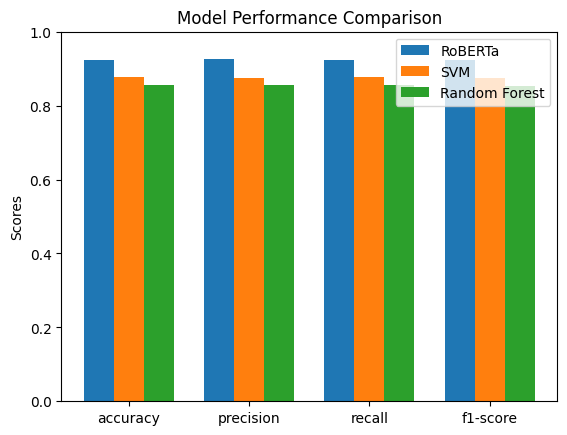

In [ ]:
# 24. Plot comparison graph
metrics = ['accuracy', 'precision', 'recall', 'f1-score']
roberta_scores = [roberta_eval_results[m] for m in metrics]
svm_scores = [svm_eval_results[m] for m in metrics]
rf_scores = [rf_eval_results[m] for m in metrics]

x = np.arange(len(metrics))
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, roberta_scores, width, label='RoBERTa')
rects2 = ax.bar(x, svm_scores, width, label='SVM')
rects3 = ax.bar(x + width, rf_scores, width, label='Random Forest')

ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.ylim(0, 1)
plt.show()

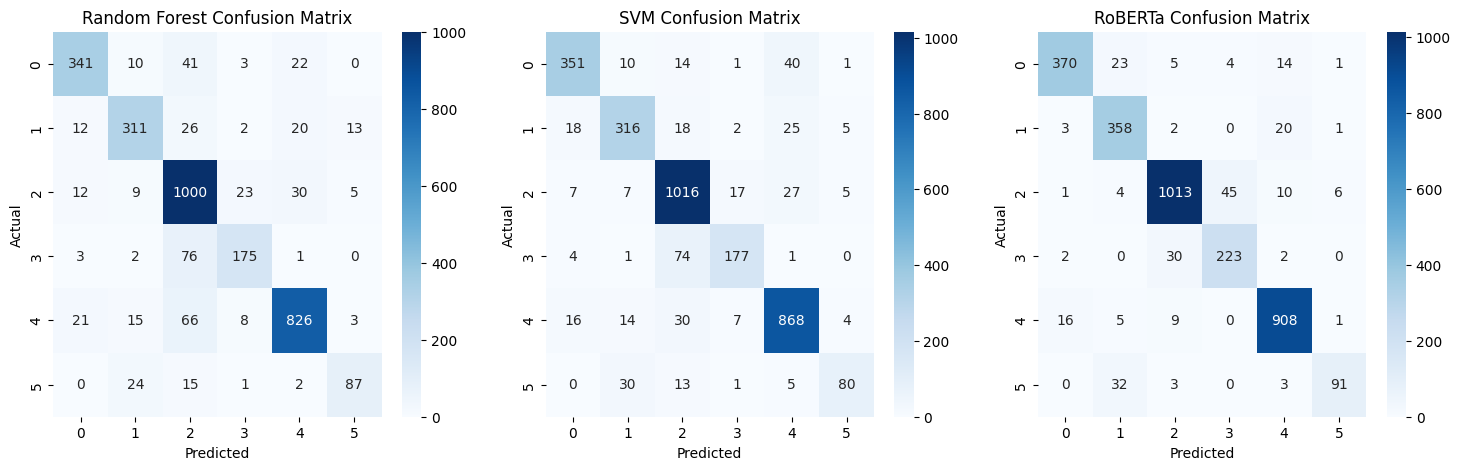

In [ ]:
# 25. Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
models = ['Random Forest', 'SVM', 'RoBERTa']
preds = [y_pred_rf, y_pred_svm, y_pred_roberta]
for i, (model, y_pred) in enumerate(zip(models, preds)):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'{model} Confusion Matrix')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')
plt.show()

In [ ]:
! pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 116.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 117.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.1 MB/s eta 0:00:00


In [ ]:
! wget -q -O - ipv4.icanhazip.com

34.143.134.64


In [ ]:
%%writefile app.py
import streamlit as st
from transformers import RobertaTokenizer, RobertaForSequenceClassification, pipeline
import os
import joblib
import torch

# Ensure the model is correctly located (Colab path handling)
model_path = "/content/saved_model"  # Adjust this if the model is in another directory

# Streamlit UI
st.title("Sentiment Classification Using RoBERTa")
st.write("Enter a text below, and the app will predict its sentiment.")

if not os.path.exists(model_path):
    st.error("Model directory not found! Ensure you have trained and saved the model.")
else:
    try:
        # Load model and tokenizer
        model = RobertaForSequenceClassification.from_pretrained(model_path)
        tokenizer = RobertaTokenizer.from_pretrained(model_path)

        # Load LabelEncoder to decode sentiment labels
        label_encoder_path = os.path.join(model_path, "label_encoder.pkl")
        if os.path.exists(label_encoder_path):
            label_encoder = joblib.load(label_encoder_path)
        else:
            st.error("Label encoder not found!")
            label_encoder = None  # Prevent crash if missing

        # Create sentiment analysis pipeline (ensuring GPU is used if available)
        device = 0 if torch.cuda.is_available() else -1  # Use GPU if available
        predictor = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer, device=device)

        # Text input
        text_input = st.text_area("Enter text:", "")

        if st.button("Analyze"):
            if text_input.strip():
                result = predictor(text_input)
                predicted_label = result[0]['label']
                confidence = result[0]['score']

                # Convert "LABEL_X" to actual sentiment if label_encoder is loaded
                if label_encoder:
                    label_index = int(predicted_label.split('_')[-1])
                    decoded_label = label_encoder.inverse_transform([label_index])[0]
                    st.success(f"**Prediction:** {decoded_label}")
                else:
                    st.success(f"**Prediction (Raw):** {predicted_label}")

                st.write(f"**Confidence:** {confidence:.4f}")

            else:
                st.warning("Please enter some text.")

    except Exception as e:
        st.error(f"Error loading model: {str(e)}")

Writing app.py


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501



⠙
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.143.134.64:8501

⠹⠸⠼⠴⠦Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸your url is: https://salty-cougars-pick.loca.lt
2025-04-17 09:51:34.822734: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744883494.868334    7344 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744883494.882168    7344 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Device set to use cuda:0
2025-04-17 09:51:41.468 Examining the path of torch.classes raised:
T

In [ ]:
"""RANDOM EXAMPLES FOR TESTING MODEL"""

# fear
        "The woods were silent—too silent. Every step I took seemed deafening against the eerie stillness. Moonlight flickered through the twisted branches, casting distorted shadows that looked like grasping hands. Suddenly, a twig snapped behind me. I froze. My breathing quickened as I turned, but there was nothing there. Or so I thought. A guttural whisper slithered through the trees, low and unintelligible. My pulse pounded as I stumbled backward. Then, from the darkness, two glowing eyes emerged—unblinking, watching. I wanted to run, but my legs refused to move."

# sadness
        "The rain tapped softly against the window as I sat alone in the dimly lit room. The once-lively laughter that filled this space was now just a distant memory, replaced by an aching silence. I traced my fingers over an old photograph, the edges worn from years of holding on. My heart felt heavy, a dull pain settling in my chest as I realized that no matter how much I longed for the past, it was gone. A single tear slipped down my cheek, lost in the shadows of the empty room."

# joy
        "The sun bathed the meadow in golden light as laughter echoed through the air. Children ran barefoot across the soft grass, their giggles mixing with the melody of birdsong. A gentle breeze carried the scent of blooming flowers, filling my heart with warmth. Nearby, friends and family gathered, their faces glowing with happiness as they shared stories and smiles. In that moment, everything felt perfect—light, free, and overflowing with joy"

# love
        "As I held their hand, warmth spread through my chest like a gentle fire. Their eyes, filled with kindness, met mine, and in that moment, the world around us faded into a soft blur. Every word, every touch, felt like a silent promise—one of understanding, of forever. The way they laughed, the way they simply existed beside me, made my heart feel lighter, as if love itself was wrapping us in an embrace. With them, I was home."

# anger
        "My hands clenched into fists as my pulse pounded in my ears. The words they had just spoken echoed in my mind, each syllable fueling the fire burning inside me. I could feel my face grow hot, my breath coming in short, sharp bursts. How could they be so careless, so unfair? The injustice of it all tightened in my chest like a vice, and every fiber of my being screamed for me to fight back. But I bit my tongue, forcing myself to swallow the rage, even as it threatened to consume me."

# surprise
        "I tore open the small gift box, expecting something ordinary. But as I lifted the lid, my eyes widened, and my breath hitched. Inside was a set of keys—car keys. My mind raced, struggling to process what I was seeing. I turned to my family, my voice caught between a gasp and a laugh. "Is this... real?" They all grinned and nodded. A rush of excitement and disbelief flooded through me. I never expected this—never in my wildest dreams. My hands shook as I held the keys, overwhelmed with sheer, joyful shock."





"""MODI SPEECHES FOR TESTING MODEL"""

Anger:
        "My fellow Indians, I am filled with rage when I see the corruption that has poisoned our system! How much longer will we let the corrupt loot our nation without fear? How long will we remain silent while our youth are denied justice and opportunity? I will not tolerate this betrayal any longer! Those who think they can divide us for their selfish gain—hear me loud and clear—we will expose you, we will defeat you! Every Indian must rise and roar against injustice, against exploitation, and against the forces trying to break our spirit. This is not a plea—it is a warning. We will not forgive. We will not forget. Bharat will rise in anger, and we will build a new India with fire in our hearts!"

Surprise:
        "My fellow Indians, today, I stand before you with news that will leave you in awe. For years, we have worked tirelessly, overcoming challenges, defying expectations, and proving our mettle to the world. And today, I am proud to announce a milestone that no one saw coming! India has achieved something extraordinary—something that will be written in golden letters in history. This is a moment of immense pride, a moment of astonishment, a moment that will inspire generations to come. My dear countrymen, this is not just a success; this is a testament to India’s strength, determination, and unwavering resolve. The world is watching us with amazement, and today, we have surprised even the greatest skeptics. The impossible has become possible, and India is leading the way!"

Joy:
        "My brothers and sisters, today is a day of happiness, a day of celebration! Our country is moving forward, our youth are achieving great things, and the world is recognizing India's strength! This joy is not just mine; it belongs to every Indian who works hard, who dreams big, who never gives up! Let us celebrate this success, but let us also promise to continue this journey, to make our Bharat even greater, even stronger, even brighter!"

Sadness:
        "Today, my heart is heavy. We have lost brave souls, our people have suffered, and our nation grieves. But in this moment of pain, we must remember—we are one family, and when one of us falls, we all rise together. India has faced tragedies before, but we have never been defeated. We mourn today, but tomorrow, we will rebuild, we will stand stronger, and we will honor those we have lost by ensuring a brighter future for all."

Fear:
        "My dear citizens, we live in times of uncertainty. There are forces that try to weaken our country, to spread fear among our people. But I tell you today—do not be afraid! Fear is the weapon of the weak. India is strong, and its people are even stronger. Challenges may come, but we will face them with courage. We will not let fear dictate our future. Together, we will protect our nation, our values, and our dreams!"

Love:
        "My beloved people, there is nothing more powerful than love—love for our nation, love for our fellow citizens, love for our families. This love is what makes India great! It is in the kindness of a stranger, in the sacrifice of a soldier, in the dreams of a child. If we love our country, we must work for it, build it, protect it. Let us spread this love, let us unite, and let us create a Bharat that is as strong as it is compassionate!"


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
save_path = "/content/drive/MyDrive/saved_model"
model.save_pretrained(save_path)
tokenizer.save_pretrained(save_path)
joblib.dump(label_encoder, f"{save_path}/label_encoder.pkl")

Mounted at /content/drive


NameError: name 'model' is not defined

In [ ]:
import shutil

folders = ["/content/logs", "/content/results", "/content/saved_model", "/content/sample_data"]

for folder in folders:
    shutil.rmtree(folder, ignore_errors=True)  # ignore_errors=True avoids errors if the folder doesn't exist
